<a href="https://colab.research.google.com/github/tanmaych/Testing/blob/master/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(seaborn.__version__))
print('Scipy: {}'.format(scipy.__version__))

Python: 3.6.9 (default, Jul 17 2020, 12:50:27) 
[GCC 8.4.0]
Numpy: 1.18.5
Pandas: 1.0.5
Matplotlib: 3.2.2
Seaborn: 0.10.1
Scipy: 1.4.1


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv.csv to creditcard.csv.csv


In [10]:
data = pd.read_csv('creditcard.csv.csv')
data1 = data

In [11]:
# Start exploring the dataset
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [12]:
print(data.shape)

(284807, 31)


In [13]:
print(data.describe())

                Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  284807.000000
mean    94813.859575  3.919560e-15  ...      88.349619       0.001727
std     47488.145955  1.958696e+00  ...     250.120109       0.041527
min         0.000000 -5.640751e+01  ...       0.000000       0.000000
25%     54201.500000 -9.203734e-01  ...       5.600000       0.000000
50%     84692.000000  1.810880e-02  ...      22.000000       0.000000
75%    139320.500000  1.315642e+00  ...      77.165000       0.000000
max    172792.000000  2.454930e+00  ...   25691.160000       1.000000

[8 rows x 31 columns]


In [14]:
data = data.sample(frac=0.1, random_state = 1)
print(data.shape)
print(data.describe())

(28481, 31)
                Time            V1  ...        Amount         Class
count   28481.000000  28481.000000  ...  28481.000000  28481.000000
mean    94705.035216     -0.001143  ...     89.957884      0.001720
std     47584.727034      1.994661  ...    270.894630      0.041443
min         0.000000    -40.470142  ...      0.000000      0.000000
25%     53924.000000     -0.908809  ...      5.980000      0.000000
50%     84551.000000      0.031139  ...     22.350000      0.000000
75%    139392.000000      1.320048  ...     78.930000      0.000000
max    172784.000000      2.411499  ...  19656.530000      1.000000

[8 rows x 31 columns]


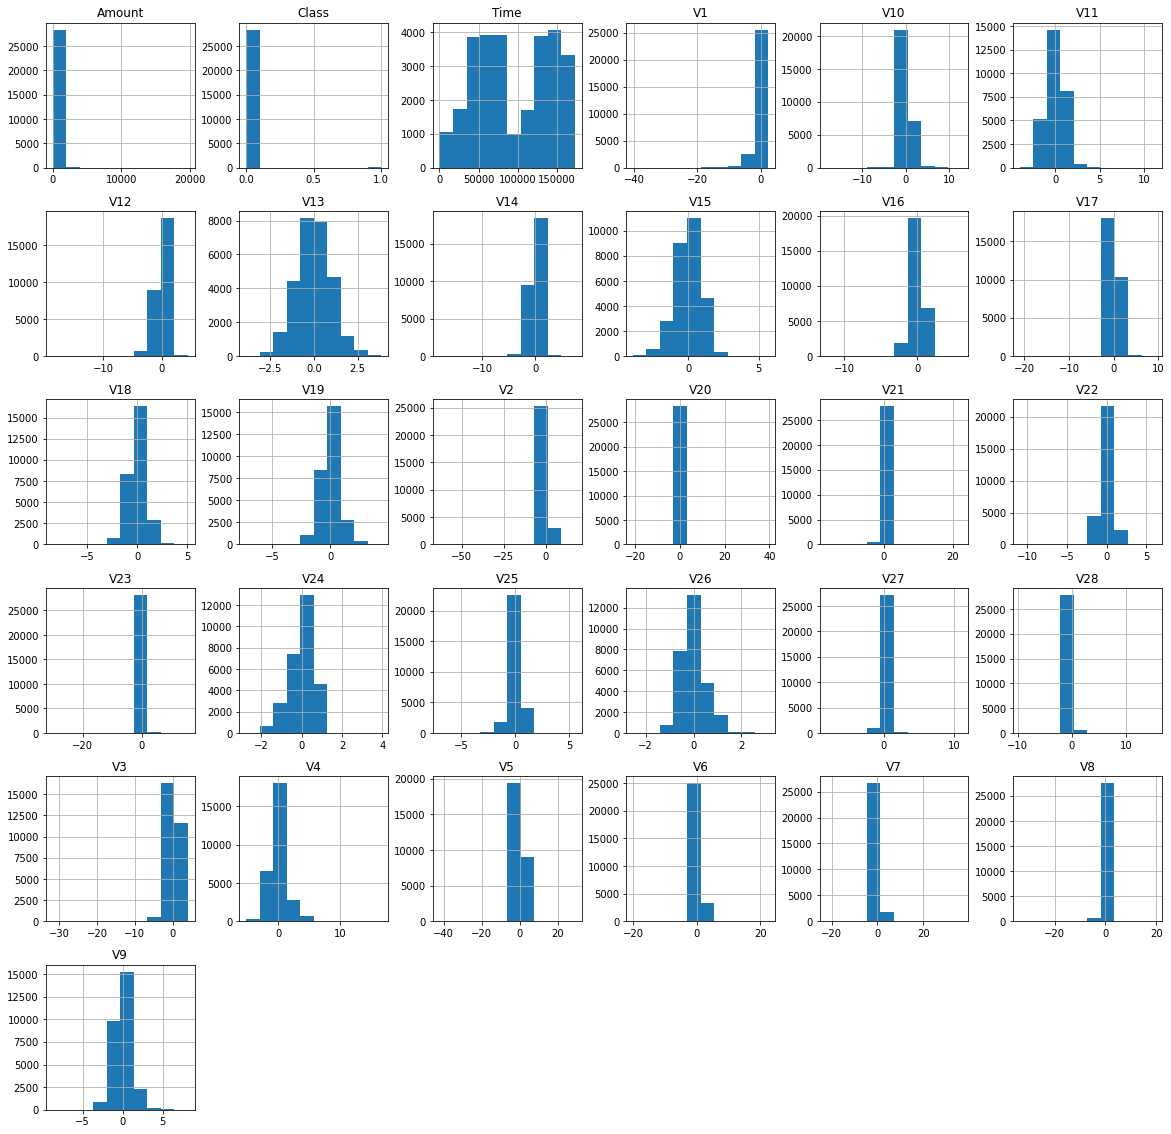

In [15]:
data.hist(figsize = (20, 20))
plt.show()

In [16]:
#determining the number of fraud cases in the dataset
Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0017234102419808666
Fraud Cases: 49
Valid Transactions: 28432


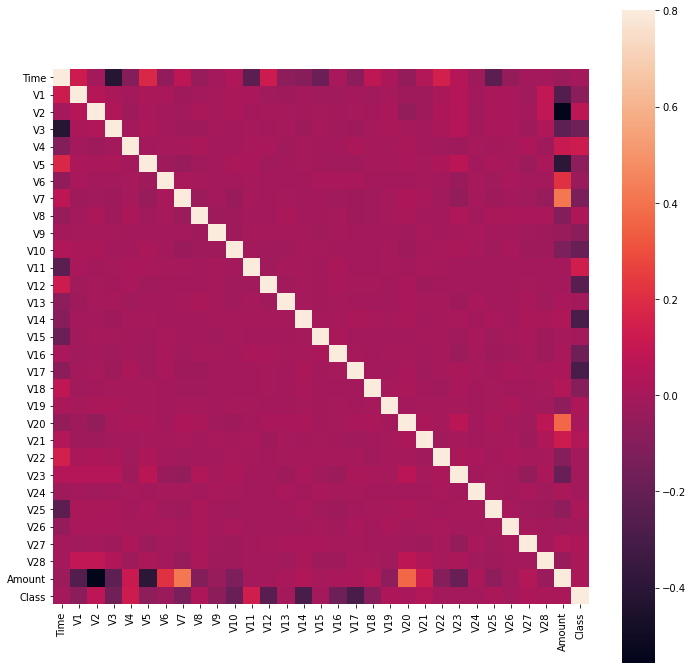

In [17]:
#correlation matrix to study the dependence between the parameters
corrmat = data.corr()
fig = plt.figure(figsize = (12, 12))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [18]:
columns = data.columns.tolist()

# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]

# Store the variable we'll be predicting on
target = "Class"

X = data[columns]
Y = data[target]
x1 = data1.drop(["Class"] , axis = 1)
y1 = data1['Class']

# Print shapes
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


In [19]:
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score , classification_report

In [20]:
# Using Skicit-learn to split data into training and testing sets 
from sklearn.model_selection import train_test_split 
# Split the data into training and testing sets 
xTrain, xTest, yTrain, yTest = train_test_split(x1.values, y1.values, test_size = 0.2, random_state = 42)

**RANDOM** **FOREST**

In [21]:
rfc = RandomForestClassifier() 
rfc.fit(xTrain, yTrain) 
# predictions 

ypred = rfc.predict(xTest) 
# ypred[ypred==1] = 0 
# ypred[ypred==-1] = 1
n_errors = (ypred!=yTest).sum()
clf_name = "Random Factor"
print('{}: {}'.format(clf_name, n_errors))
print("Accuracy:")
print(accuracy_score(yTest, ypred))
print(classification_report(yTest, ypred))

Random Factor: 23
Accuracy:
0.9995962220427653
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



**Local** **Outlier** **Factor**

In [22]:
clf = LocalOutlierFactor(contamination = outlier_fraction)
ypred = clf.fit_predict(X , Y)
ypred[ypred==1] = 0 
ypred[ypred==-1] = 1
n_errors = (ypred!=Y).sum()
clf_name = "Local Outlier Factor"
print('{}: {}'.format(clf_name, n_errors))
print("Accuracy")
print(accuracy_score(Y, ypred))
print(classification_report(Y, ypred))

Local Outlier Factor: 97
Accuracy
0.9965942207085425
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481



**Isolation** **Forest**

In [23]:
clf = IsolationForest(max_samples = len(X) , contamination = outlier_fraction)
clf.fit(X , Y)
ypred = clf.predict(X)
ypred[ypred==1] = 0 
ypred[ypred==-1] = 1
n_errors = (ypred!=Y).sum()
clf_name = "Isolation Forest"
print('{}: {}'.format(clf_name, n_errors))
print("Accuracy")
print(accuracy_score(Y, ypred))
print(classification_report(Y, ypred))

Isolation Forest: 73
Accuracy
0.9974368877497279
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.26      0.27      0.26        49

    accuracy                           1.00     28481
   macro avg       0.63      0.63      0.63     28481
weighted avg       1.00      1.00      1.00     28481



**Gaussian** **Methods**

In [24]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X ,Y)
ypred = clf.predict(xTest)
n_errors = (ypred!=yTest).sum()
clf_name = "Guassian Method"
print('{}: {}'.format(clf_name, n_errors))
print("Accuracy")
print(accuracy_score(yTest, ypred))
print(classification_report(yTest, ypred))

Guassian Method: 501
Accuracy
0.9912046627576279
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.12      0.67      0.21        98

    accuracy                           0.99     56962
   macro avg       0.56      0.83      0.60     56962
weighted avg       1.00      0.99      0.99     56962



Random Forest has highest precision of 0.97 while isolation has second highest precision of 0.26